In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling  

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [4]:
house_price = pd.read_csv("C:\\Users\\Naman\\Downloads\\AnalytixLab\\Predictive Modeling\\Predictive Modeling\\Case Study - Housing Example\\House_Prices.csv")

In [15]:
pandas_profiling.ProfileReport(house_price)

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.6 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [14]:
house_price.sample(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
6,7,151600,1830,3,3,3,Yes,West
17,18,83600,1990,3,3,4,No,North
111,112,114900,1740,2,2,2,No,North
122,123,144800,2060,2,2,1,Yes,East
123,124,119700,1900,3,3,3,Yes,East


In [6]:
house_price_num=house_price.select_dtypes(include=['float32','float64','int32','int64'])

In [7]:
house_price_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
Home         128 non-null int64
Price        128 non-null int64
SqFt         128 non-null int64
Bedrooms     128 non-null int64
Bathrooms    128 non-null int64
Offers       128 non-null int64
dtypes: int64(6)
memory usage: 6.1 KB


In [10]:
house_price_num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [11]:
house_price_num.sample(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
18,19,111400,1700,2,2,1
23,24,106100,1820,3,2,3
75,76,106900,1900,2,2,2
79,80,143600,1780,4,2,1
47,48,90300,2050,3,2,6


In [8]:
house_price_cat=house_price.select_dtypes(include=['object'])

In [9]:
house_price_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: object(2)
memory usage: 2.1+ KB


In [12]:
house_price_cat.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [13]:
house_price_cat.sample(5)

,Brick,Neighborhood
89,No,North
108,Yes,East
101,No,East
90,No,West
45,No,East


In [21]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=house_price_num.apply(lambda x: var_summary(x)).T

In [22]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [23]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

house_price_num=house_price_num.apply(lambda x: outlier_capping(x))

In [24]:
num_summary=house_price_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.00,64.500000,64.5,37.053408,1.372955e+03,2.27,2.4671,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.5329,126.73
Price,128.0,0.0,16689692.00,130388.218750,125950.0,26280.461229,6.906626e+08,81570.00,81767.1000,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,194268.4800,196476.00
SqFt,128.0,0.0,256103.00,2000.804688,2000.0,207.625863,4.310850e+04,1530.80,1538.6840,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2487.9610,2505.70
Bedrooms,128.0,0.0,386.46,3.019219,3.0,0.715071,5.113269e-01,2.00,2.0000,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.5329,4.73
Bathrooms,128.0,0.0,312.00,2.437500,2.0,0.498028,2.480315e-01,2.00,2.0000,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.0000,3.00
Offers,128.0,0.0,329.00,2.570312,3.0,1.047559,1.097379e+00,1.00,1.0000,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.0000,5.00


In [25]:
#Categorical Variables Summary
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=house_price_cat.apply(lambda x: cat_summary(x))

In [28]:
cat_summary

,Brick,Neighborhood
N,128,128
NMISS,0,0
ColumnsNames,"No 86 Yes 42 Name: Brick, dtype: int64",East 45 North 44 West 39 Name: Neig...


In [29]:
#Creating dummies for categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [30]:
house_price_cat.columns

Index(['Brick', 'Neighborhood'], dtype='object')

In [33]:
for c_feature in ['Brick', 'Neighborhood']:
    house_price_cat[c_feature] = house_price_cat[c_feature].astype('category')
    house_price_cat = create_dummies(house_price_cat , c_feature )

C:\Users\Naman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
house_price_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
dtypes: uint8(3)
memory usage: 464.0 bytes


In [36]:
house_price_new = pd.concat([house_price_num, house_price_cat], axis=1)

In [42]:
house_price_new.sample(10)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
82,83.0,164800.0,2050.0,2.0,2.0,1.0,1,0,1
17,18.0,83600.0,1990.0,3.0,3.0,4.0,0,1,0
110,111.0,111600.0,1710.0,2.0,2.0,1.0,0,1,0
74,75.0,144200.0,2140.0,3.0,3.0,3.0,0,0,1
4,5.0,119800.0,2130.0,3.0,3.0,3.0,0,0,0
124,125.0,147900.0,2160.0,4.0,3.0,3.0,1,0,0
86,87.0,102700.0,1900.0,4.0,2.0,4.0,0,1,0
11,12.0,123000.0,1870.0,2.0,2.0,2.0,1,0,0
97,98.0,126800.0,2000.0,2.0,2.0,1.0,1,0,0
72,73.0,107300.0,1650.0,3.0,2.0,3.0,0,1,0


In [43]:
pandas_profiling.ProfileReport(house_price_new)

Number of variables,9
Number of observations,128
Total Missing (%),0.0%
Total size in memory,6.5 KiB
Average record size in memory,51.6 B
Numeric,5
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [44]:
house_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
Home                  128 non-null float64
Price                 128 non-null float64
SqFt                  128 non-null float64
Bedrooms              128 non-null float64
Bathrooms             128 non-null float64
Offers                128 non-null float64
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
dtypes: float64(6), uint8(3)
memory usage: 6.5 KB


C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


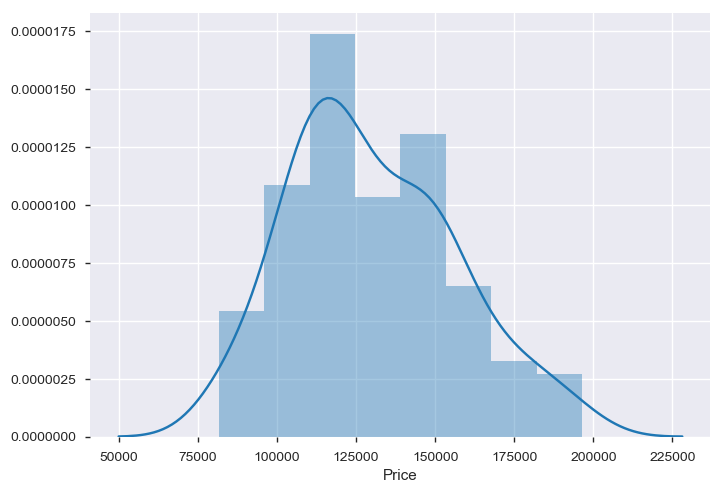

In [45]:
#Assumption 1: Y follows linear distribution or not?
import seaborn as sns
sns.distplot(house_price_new.Price)

In [46]:
house_price_new['ln_price']=np.log(house_price_new['Price'])

In [48]:
house_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
Home                  128 non-null float64
Price                 128 non-null float64
SqFt                  128 non-null float64
Bedrooms              128 non-null float64
Bathrooms             128 non-null float64
Offers                128 non-null float64
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
ln_price              128 non-null float64
dtypes: float64(7), uint8(3)
memory usage: 7.5 KB


C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


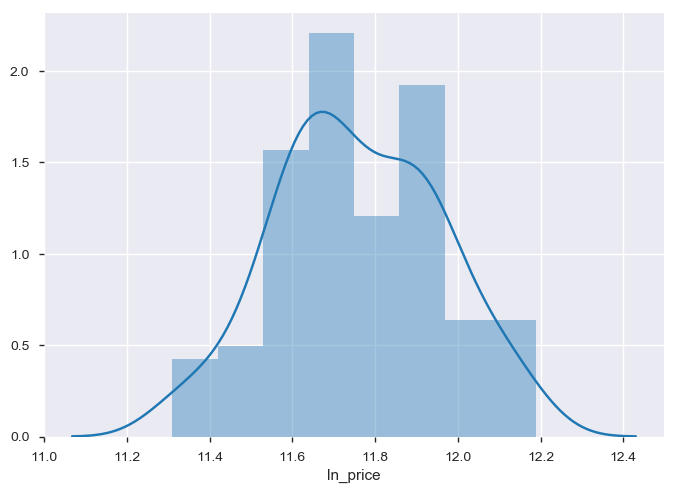

In [49]:
sns.distplot(house_price_new.ln_price)

In [50]:
#As ln_price and price follows almost same distribution we can use any of them.

In [52]:
#dropping price variable
house_price_new.drop('Price',axis=1,inplace=True)

In [53]:
house_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
Home                  128 non-null float64
SqFt                  128 non-null float64
Bedrooms              128 non-null float64
Bathrooms             128 non-null float64
Offers                128 non-null float64
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
ln_price              128 non-null float64
dtypes: float64(6), uint8(3)
memory usage: 6.5 KB


In [77]:
#Feature Selection(We will not use here as variable number is very low)
X=house_price_new.corr()
X['ln_price']
#sns.heatmap(X)

Home                  0.104305
SqFt                  0.553127
Bedrooms              0.506316
Bathrooms             0.493268
Offers               -0.326033
Brick_Yes             0.443745
Neighborhood_North   -0.562398
Neighborhood_West     0.697178
ln_price              1.000000
ln_home               0.136440
Name: ln_price, dtype: float64

In [61]:
house_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
Home                  128 non-null float64
SqFt                  128 non-null float64
Bedrooms              128 non-null float64
Bathrooms             128 non-null float64
Offers                128 non-null float64
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
ln_price              128 non-null float64
dtypes: float64(6), uint8(3)
memory usage: 6.5 KB


C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


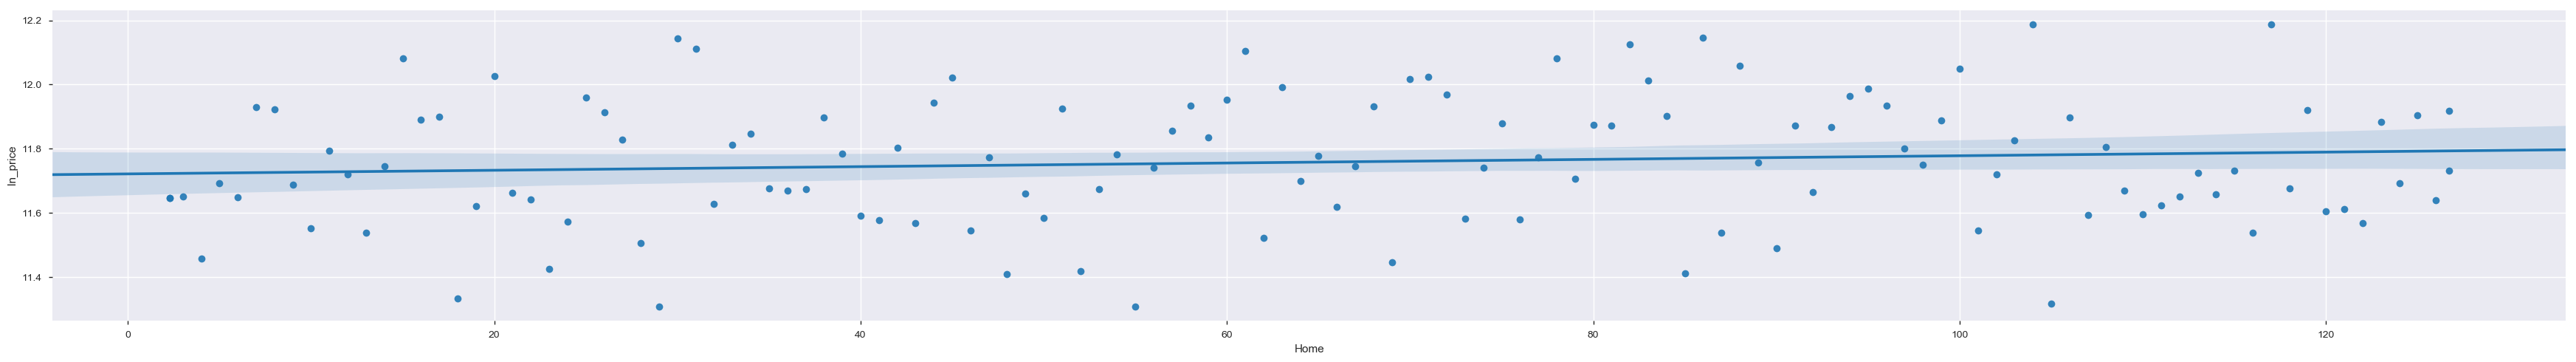

In [67]:
#Assumption 2: X variables should always be linearly related with Y
sns.lmplot(x='Home', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


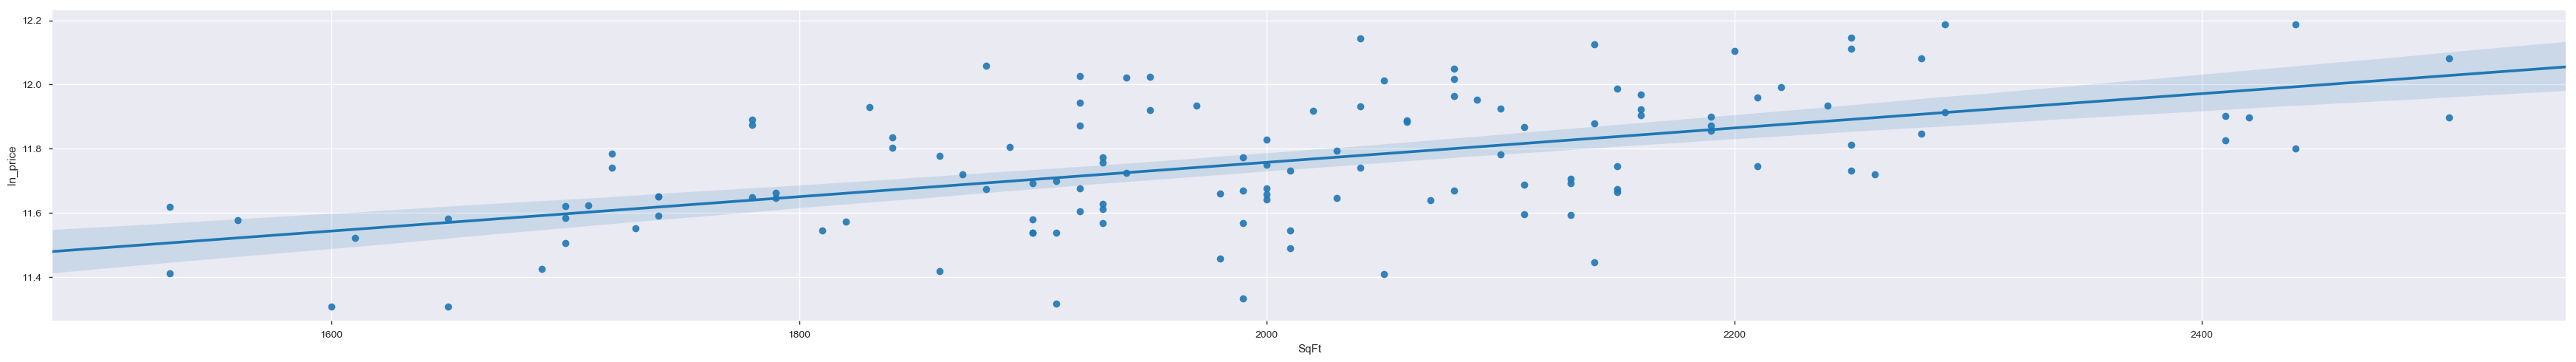

In [66]:
sns.lmplot(x='SqFt', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


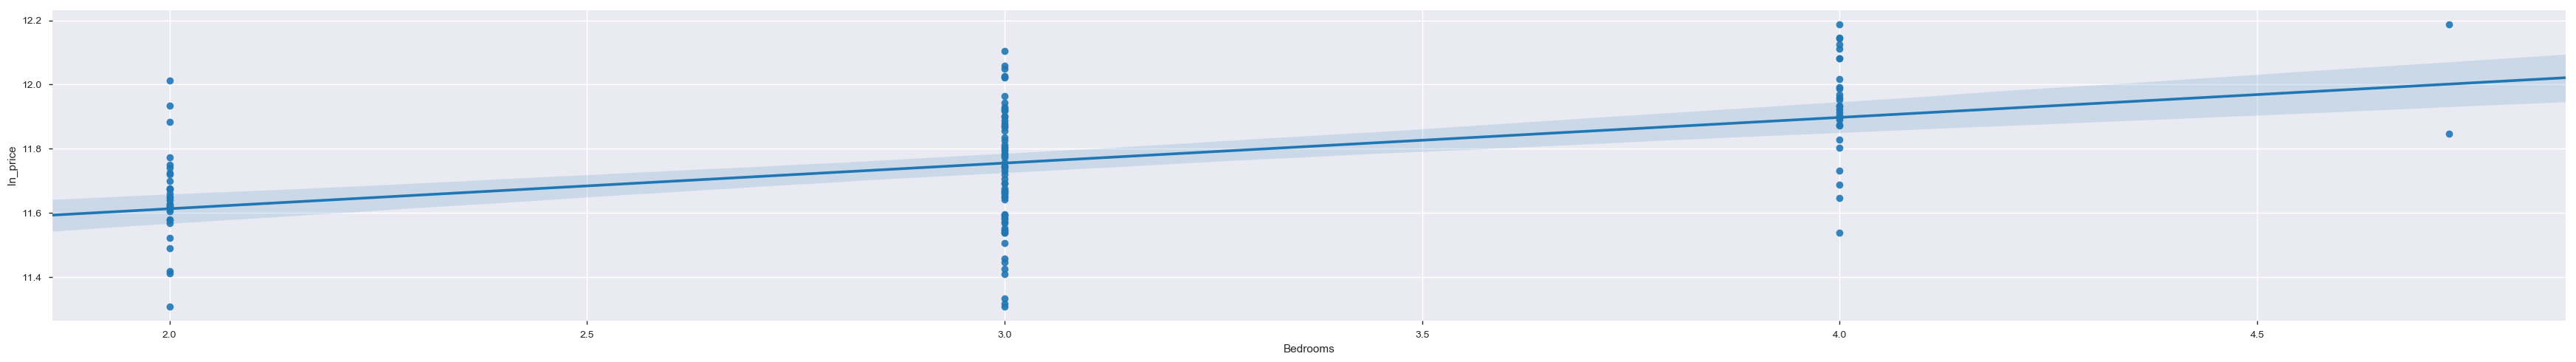

In [65]:
sns.lmplot(x='Bedrooms', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


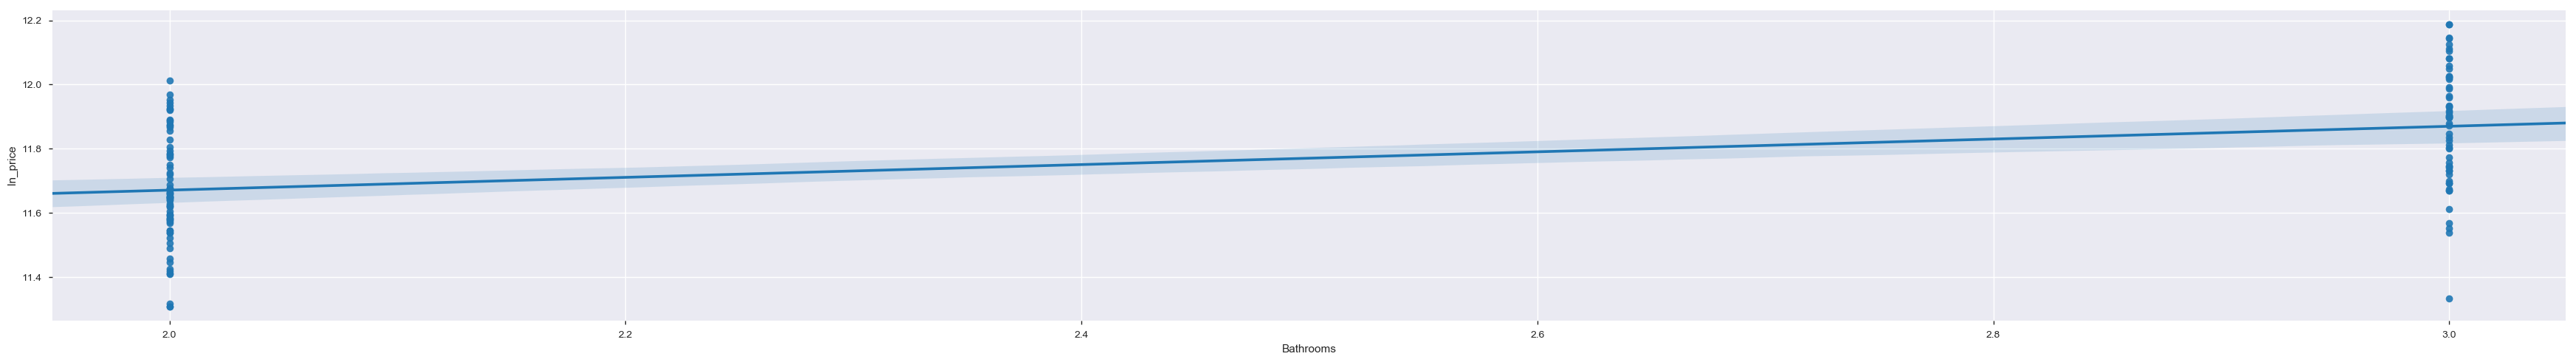

In [68]:
sns.lmplot(x='Bathrooms', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


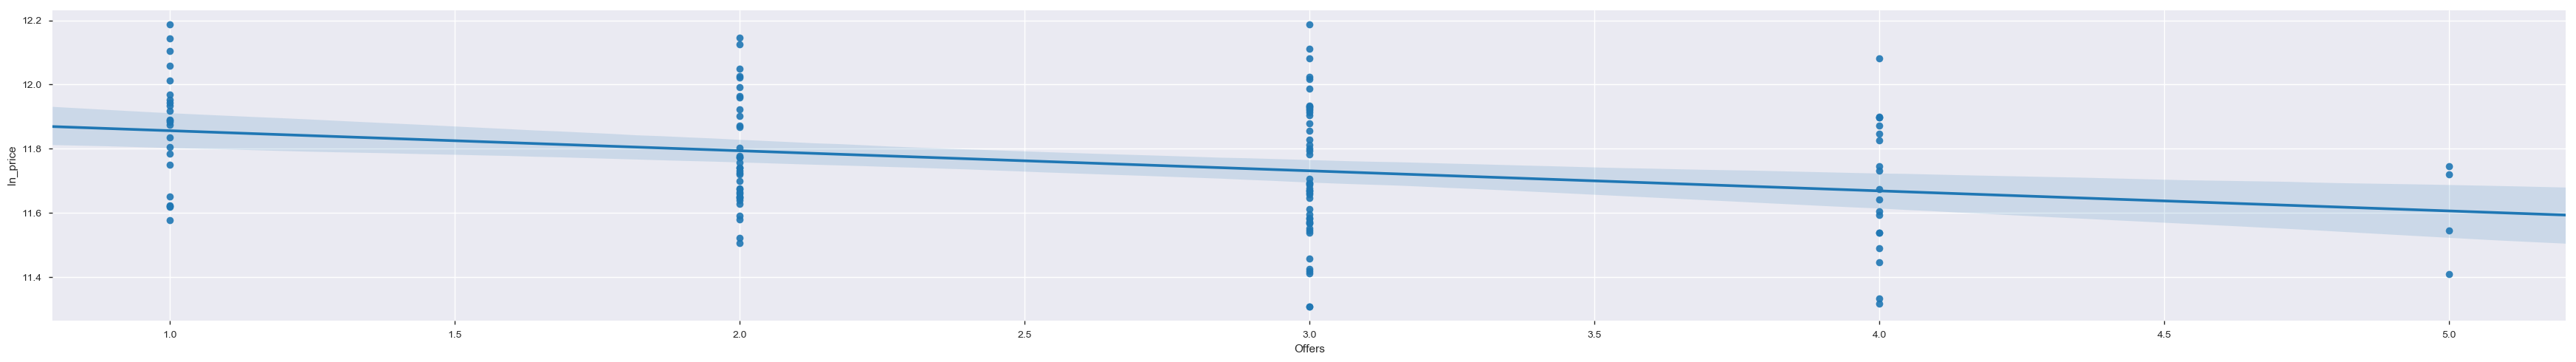

In [69]:
sns.lmplot(x='Offers', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


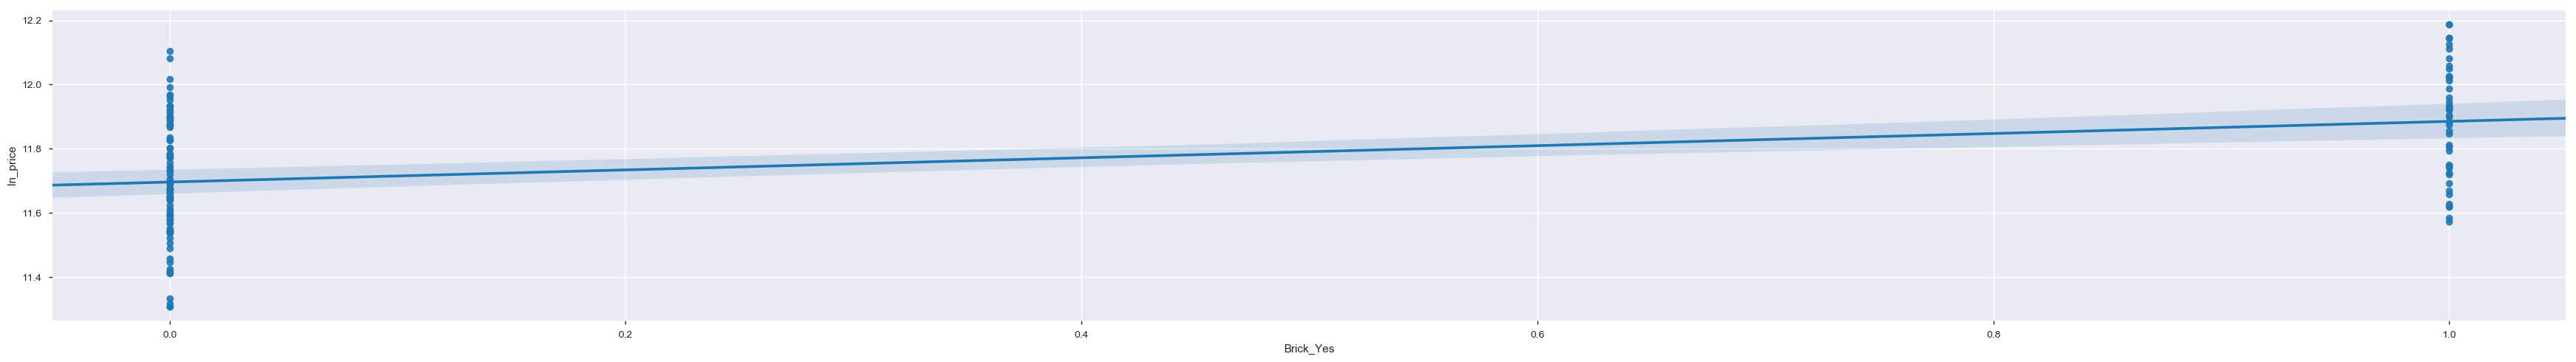

In [70]:
sns.lmplot(x='Brick_Yes', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


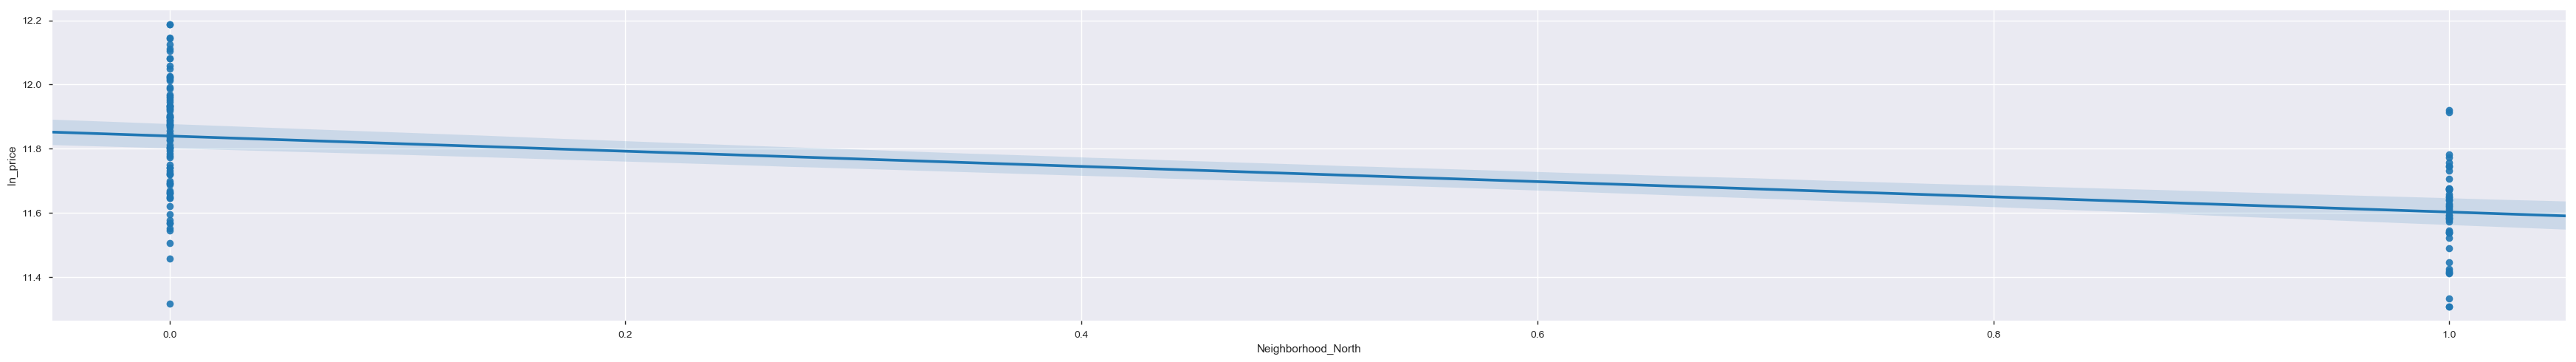

In [71]:
sns.lmplot(x='Neighborhood_North', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


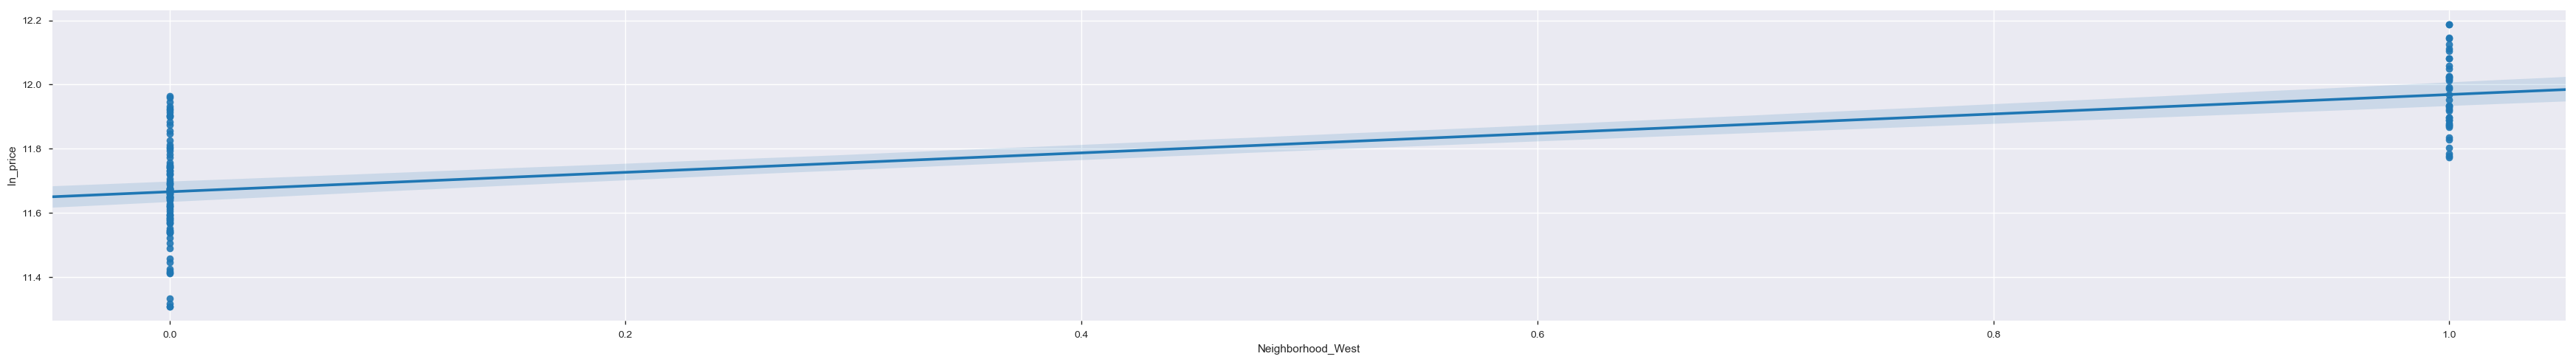

In [72]:
sns.lmplot(x='Neighborhood_West', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

In [74]:
house_price_new['ln_home']=np.log(house_price_new['Home'])

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


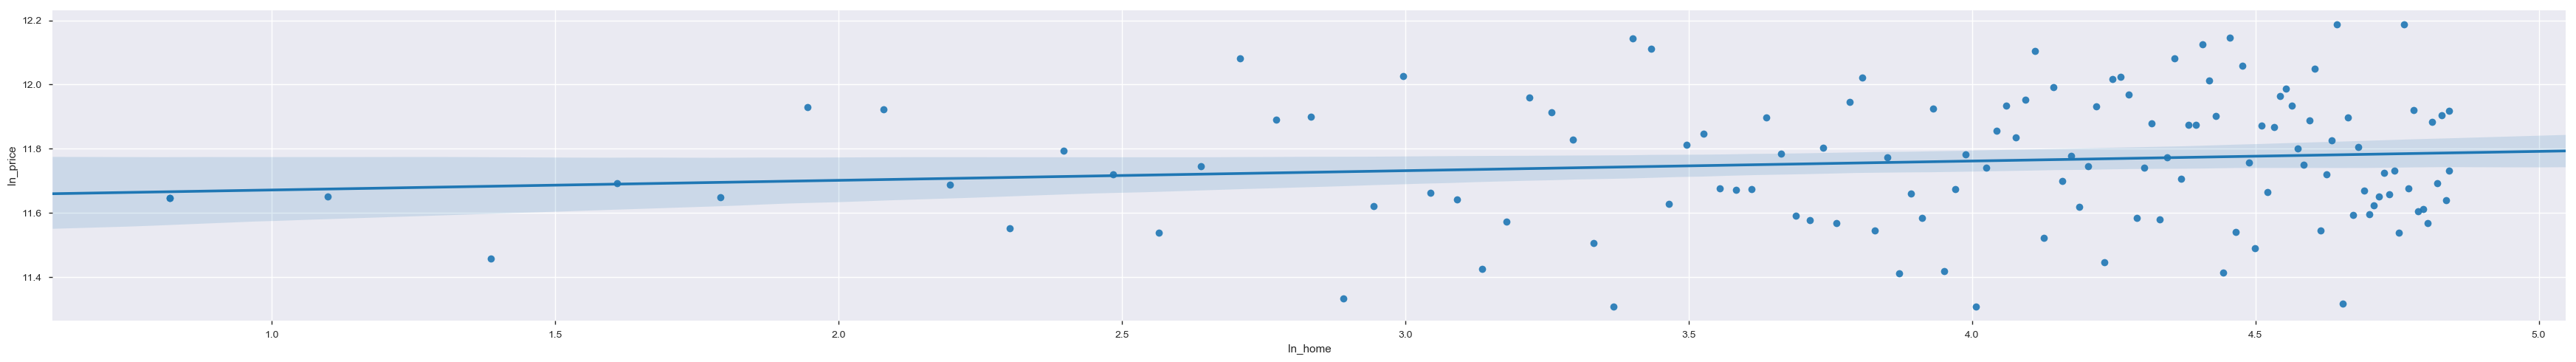

In [75]:
sns.lmplot(x='ln_home', y='ln_price',data=house_price_new,aspect=7,scatter_kws={'alpha':0.9})

In [76]:
X['ln_price']

Home                  0.104305
SqFt                  0.553127
Bedrooms              0.506316
Bathrooms             0.493268
Offers               -0.326033
Brick_Yes             0.443745
Neighborhood_North   -0.562398
Neighborhood_West     0.697178
ln_price              1.000000
Name: ln_price, dtype: float64

In [78]:
house_price_new.drop('Home',axis=1,inplace=True)

In [79]:
house_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
SqFt                  128 non-null float64
Bedrooms              128 non-null float64
Bathrooms             128 non-null float64
Offers                128 non-null float64
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
ln_price              128 non-null float64
ln_home               128 non-null float64
dtypes: float64(6), uint8(3)
memory usage: 6.5 KB


In [80]:
# Splitting data and building model

feature_columns=house_price_new.columns.difference(['ln_price'])

In [81]:
feature_columns

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West', 'Offers', 'SqFt', 'ln_home'],
      dtype='object')

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
train_test_split?

In [87]:
train_X,test_X,train_Y,test_Y=train_test_split(house_price_new[feature_columns],house_price_new['ln_price'],test_size=0.3,random_state=1)

In [89]:
import statsmodels.api as sm

In [90]:
train_X=sm.add_constant(train_X)

In [92]:
train_X.head()

,const,Bathrooms,Bedrooms,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,SqFt,ln_home
58,1.0,3.0,3.0,0,0,1,1.0,1840.0,4.077537
42,1.0,2.0,2.0,0,0,0,3.0,1990.0,3.761200
66,1.0,3.0,3.0,0,1,0,4.0,2210.0,4.204693
85,1.0,3.0,4.0,1,0,1,2.0,2250.0,4.454347
10,1.0,2.0,3.0,1,0,0,3.0,2030.0,2.397895


In [94]:
train_Y.head()

58    11.835733
42    11.567414
66    11.745623
85    12.145792
10    11.794338
Name: ln_price, dtype: float64

In [95]:
#building model

lm=sm.OLS(train_Y,train_X).fit()

In [96]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     76.01
Date:                Wed, 15 May 2019   Prob (F-statistic):           3.57e-34
Time:                        14:04:06   Log-Likelihood:                 115.29
No. Observations:                  89   AIC:                            -212.6
Df Residuals:                      80   BIC:                            -190.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.7956      0.083    130.255      0.000      10.631      10.961
Bathrooms              0.0712      0.019      3.759      0.000       0.034       0.109
Bedrooms               0.0244      0.014      1.777      0.079      -0.003       0.052
Brick_Yes              0.1174      0.017      6.840      0.000       0.083       0.151
Neighborhood_North     0.0059      0.022      0.266      0.791      -0.038       0.050
Neighborhood_West      0.1599      0.021      7.591      0.000       0.118       0.202
Offers                -0.0630      0.010     -6.386      0.000      -0.083      -0.043
SqFt                   0.0004   5.11e-05      7.956      0.000       0.000       0.001
ln_home               -0.0046      0.009     -0.536      0.594      -0.022       0.013
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.217
Skew:                           0.066   Prob(JB):                        0.897
Kurtosis:                       3.202   Cond. No.                     2.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
feature_columns=house_price_new.columns.difference(['ln_price','Neighborhood_North'])

In [98]:
feature_columns

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Neighborhood_West', 'Offers',
       'SqFt', 'ln_home'],
      dtype='object')

In [123]:
train_X,test_X,train_Y,test_Y=train_test_split(house_price_new[feature_columns],house_price_new['ln_price'],test_size=0.3,random_state=123)
train_X=sm.add_constant(train_X)
lm=sm.OLS(train_Y,train_X).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     65.95
Date:                Wed, 15 May 2019   Prob (F-statistic):           8.29e-31
Time:                        14:41:54   Log-Likelihood:                 101.43
No. Observations:                  89   AIC:                            -186.9
Df Residuals:                      81   BIC:                            -167.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.7496      0.090    119.574      0.000      10.571      10.928
Bathrooms             0.0629      0.022      2.920      0.005       0.020       0.106
Bedrooms              0.0244      0.017      1.431      0.156      -0.010       0.058
Brick_Yes             0.1304      0.020      6.508      0.000       0.091       0.170
Neighborhood_West     0.1708      0.026      6.651      0.000       0.120       0.222
Offers               -0.0644      0.010     -6.549      0.000      -0.084      -0.045
SqFt                  0.0004   5.43e-05      8.029      0.000       0.000       0.001
ln_home              -0.0056      0.011     -0.528      0.599      -0.027       0.015
==============================================================================
Omnibus:                        6.392   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.181
Skew:                          -0.371   Prob(JB):                       0.0276
Kurtosis:                       4.178   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
feature_columns=house_price_new.columns.difference(['ln_price','Neighborhood_North','ln_home'])

In [125]:
train_X,test_X,train_Y,test_Y=train_test_split(house_price_new[feature_columns],house_price_new['ln_price'],test_size=0.3,random_state=123)
train_X=sm.add_constant(train_X)
lm=sm.OLS(train_Y,train_X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     77.57
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.03e-31
Time:                        14:42:08   Log-Likelihood:                 101.28
No. Observations:                  89   AIC:                            -188.6
Df Residuals:                      82   BIC:                            -171.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.7346      0.085    126.454      0.000      10.566      10.903
Bathrooms             0.0608      0.021      2.884      0.005       0.019       0.103
Bedrooms              0.0265      0.017      1.603      0.113      -0.006       0.059
Brick_Yes             0.1307      0.020      6.554      0.000       0.091       0.170
Neighborhood_West     0.1708      0.026      6.682      0.000       0.120       0.222
Offers               -0.0642      0.010     -6.558      0.000      -0.084      -0.045
SqFt                  0.0004   5.33e-05      8.084      0.000       0.000       0.001
==============================================================================
Omnibus:                        5.338   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.406
Skew:                          -0.346   Prob(JB):                       0.0670
Kurtosis:                       3.989   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
feature_columns=house_price_new.columns.difference(['ln_price','Neighborhood_North','ln_home','Bedrooms'])
train_X,test_X,train_Y,test_Y=train_test_split(house_price_new[feature_columns],house_price_new['ln_price'],test_size=0.3,random_state=123)
train_X=sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm=sm.OLS(train_Y,train_X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     90.86
Date:                Wed, 15 May 2019   Prob (F-statistic):           3.58e-32
Time:                        14:50:46   Log-Likelihood:                 99.908
No. Observations:                  89   AIC:                            -187.8
Df Residuals:                      83   BIC:                            -172.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.7572      0.085    127.303      0.000      10.589      10.925
Bathrooms             0.0626      0.021      2.945      0.004       0.020       0.105
Brick_Yes             0.1286      0.020      6.401      0.000       0.089       0.169
Neighborhood_West     0.1910      0.022      8.500      0.000       0.146       0.236
Offers               -0.0621      0.010     -6.345      0.000      -0.082      -0.043
SqFt                  0.0005   5.22e-05      8.669      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                5.523
Skew:                          -0.176   Prob(JB):                       0.0632
Kurtosis:                       4.169   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
#method2
train,test=train_test_split(house_price_new,test_size=0.3,random_state=123)

In [127]:
train.columns=[phrase.strip().replace('-','_') for phrase in train.columns]

In [128]:
all_columns='+'.join(train.columns.difference(['ln_price','Neighborhood_North','ln_home','Bedrooms']))

In [129]:
all_columns

'Bathrooms+Brick_Yes+Neighborhood_West+Offers+SqFt'

In [130]:
my_formula='ln_price~'+all_columns

In [131]:
import statsmodels.formula.api as smf

In [132]:
lml=smf.ols(formula=my_formula,data=train).fit()

In [133]:
lml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     90.86
Date:                Wed, 15 May 2019   Prob (F-statistic):           3.58e-32
Time:                        14:42:28   Log-Likelihood:                 99.908
No. Observations:                  89   AIC:                            -187.8
Df Residuals:                      83   BIC:                            -172.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.7572      0.085    127.303      0.000      10.589      10.925
Bathrooms             0.0626      0.021      2.945      0.004       0.020       0.105
Brick_Yes             0.1286      0.020      6.401      0.000       0.089       0.169
Neighborhood_West     0.1910      0.022      8.500      0.000       0.146       0.236
Offers               -0.0621      0.010     -6.345      0.000      -0.082      -0.043
SqFt                  0.0005   5.22e-05      8.669      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                5.523
Skew:                          -0.176   Prob(JB):                       0.0632
Kurtosis:                       4.169   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#Assumption 3 : As DW is in range 1.8 to 2.2 there is no autocorrelation in residuals

In [146]:
##Estimate error while building the model

y_train_pred=lm.predict(train_X)

In [147]:
train_X.head()

,const,Bathrooms,Brick_Yes,Neighborhood_West,Offers,SqFt
79,1.0,2.0,0,1,1.0,1780.0
104,1.0,2.0,0,0,4.0,1910.0
60,1.0,3.0,0,1,1.0,2200.0
21,1.0,2.0,0,0,4.0,2000.0
11,1.0,2.0,1,0,2.0,1870.0


In [149]:
test_X.head()

,const,Bathrooms,Brick_Yes,Neighborhood_West,Offers,SqFt
4,1.0,3.0,0,0,3.0,2130.0
123,1.0,3.0,1,0,3.0,1900.0
90,1.0,2.0,0,1,2.0,1920.0
82,1.0,2.0,1,1,1.0,2050.0
42,1.0,2.0,0,0,3.0,1990.0


In [150]:
##Estimate error while building the model

y_test_pred=lm.predict(test_X)

In [151]:
from sklearn import metrics

In [152]:
metrics.mean_squared_error(test_Y,y_test_pred)

0.006191402217898349

In [153]:
metrics.mean_squared_error(train_Y,y_train_pred)

0.006201208721009106

In [154]:
##Assumption 4 : Checking multicollinearity between variables

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [156]:
feature_columns

Index(['Bathrooms', 'Brick_Yes', 'Neighborhood_West', 'Offers', 'SqFt'], dtype='object')

In [157]:
y, X = dmatrices('ln_price~Bathrooms+Brick_Yes+Neighborhood_West+Offers+SqFt',house_price_new, return_type='dataframe')

In [162]:
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [163]:
vif['features']=X.columns

In [164]:
vif

,VIF_Factor,features
0,101.522524,Intercept
1,1.452578,Bathrooms
2,1.061858,Brick_Yes
3,1.394336,Neighborhood_West
4,1.477735,Offers
5,1.631499,SqFt


In [165]:
house_price.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [166]:
#Claculating Residual

residual=train_Y-y_train_pred

C:\Users\Naman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


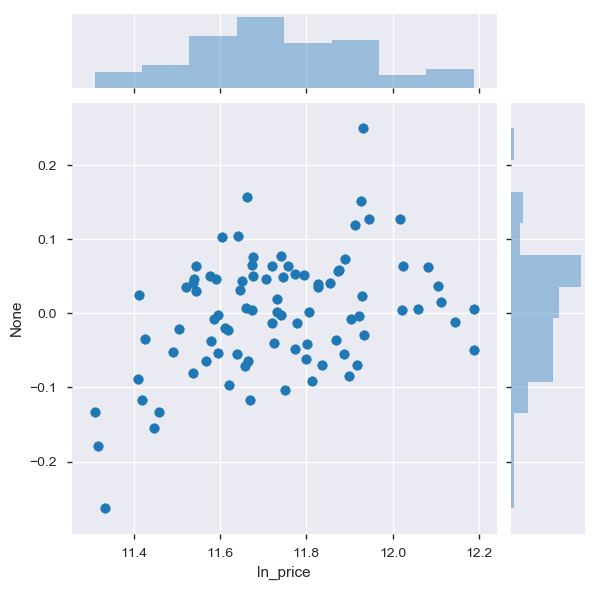

In [168]:
##Checking assumption 5 : Heteroscadasicity

sns.jointplot(train_Y,residual)

In [169]:
##QQ plot for residuals

In [170]:
from scipy import stats

In [171]:
import pylab

<function matplotlib.pyplot.show(*args, **kw)>

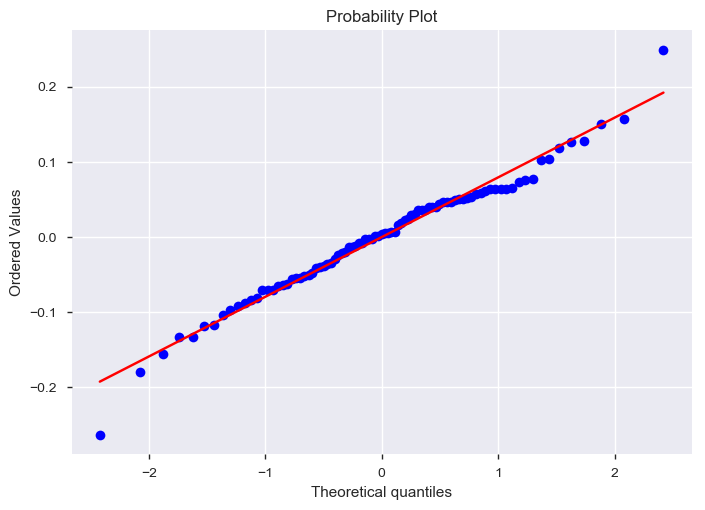

In [173]:
stats.probplot(residual,dist='norm',plot=pylab)
pylab.show

In [ ]:
lm.summary()

#Hence the equation for the model is :
'ln_price=10.7572+0.0626*Bathrooms+0.1286*Brick_Yes+0.1910*Neighborhood_West+0.0005*SqFt+(-0.0621)*Offers'